In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer['feature_names']
cancer['data']
cancer['target']
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],test_size=0.2,
                                                random_state=1)

In [9]:
lgclf = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgclf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",
         eval_set = evals, verbose = True)

[1]	valid_0's binary_logloss: 0.593721
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.542714
[3]	valid_0's binary_logloss: 0.493469
[4]	valid_0's binary_logloss: 0.455123
[5]	valid_0's binary_logloss: 0.425932
[6]	valid_0's binary_logloss: 0.392549
[7]	valid_0's binary_logloss: 0.373954
[8]	valid_0's binary_logloss: 0.350322
[9]	valid_0's binary_logloss: 0.327624
[10]	valid_0's binary_logloss: 0.307464
[11]	valid_0's binary_logloss: 0.289879
[12]	valid_0's binary_logloss: 0.278128
[13]	valid_0's binary_logloss: 0.26507
[14]	valid_0's binary_logloss: 0.250933
[15]	valid_0's binary_logloss: 0.240135
[16]	valid_0's binary_logloss: 0.234059
[17]	valid_0's binary_logloss: 0.225141
[18]	valid_0's binary_logloss: 0.220605
[19]	valid_0's binary_logloss: 0.213102
[20]	valid_0's binary_logloss: 0.210121
[21]	valid_0's binary_logloss: 0.204022
[22]	valid_0's binary_logloss: 0.197572
[23]	valid_0's binary_logloss: 0.19718
[24]	valid_0's binary_logloss

LGBMClassifier(n_estimators=400)

In [10]:
pred = lgclf.predict(X_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [13]:
prov = lgclf.predict_proba(X_test)[:,1]
prov

array([0.88010928, 0.02756436, 0.99648441, 0.01708187, 0.71053731,
       0.00408979, 0.07235819, 0.02386951, 0.99611449, 0.99441356,
       0.9940348 , 0.00800412, 0.008824  , 0.99540714, 0.96176268,
       0.97928645, 0.99633879, 0.99587328, 0.96380953, 0.01625686,
       0.99594423, 0.99402628, 0.00624271, 0.9961348 , 0.00728832,
       0.98768461, 0.90469658, 0.00544228, 0.00646985, 0.04030076,
       0.00878179, 0.9960111 , 0.00596859, 0.00830336, 0.99591703,
       0.99480943, 0.08286792, 0.98601895, 0.83949469, 0.99034658,
       0.99611821, 0.98880653, 0.94721097, 0.99369861, 0.99599827,
       0.00881775, 0.9893107 , 0.99634636, 0.91808839, 0.13159134,
       0.00894148, 0.0429148 , 0.99195379, 0.99635251, 0.927607  ,
       0.99520273, 0.99634009, 0.06073799, 0.99654577, 0.99634242,
       0.99634943, 0.09294226, 0.75039793, 0.98285881, 0.99526549,
       0.99470986, 0.9963458 , 0.01006538, 0.99584618, 0.99634486,
       0.9908811 , 0.99541727, 0.99000817, 0.00594674, 0.99016

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [16]:
get_clf_eval(y_test,pred)

오차행렬:
 [[37  5]
 [ 0 72]]

정확도: 0.9561
정밀도: 0.9351
재현율: 1.0000
F1: 0.9664
AUC: 0.9405


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

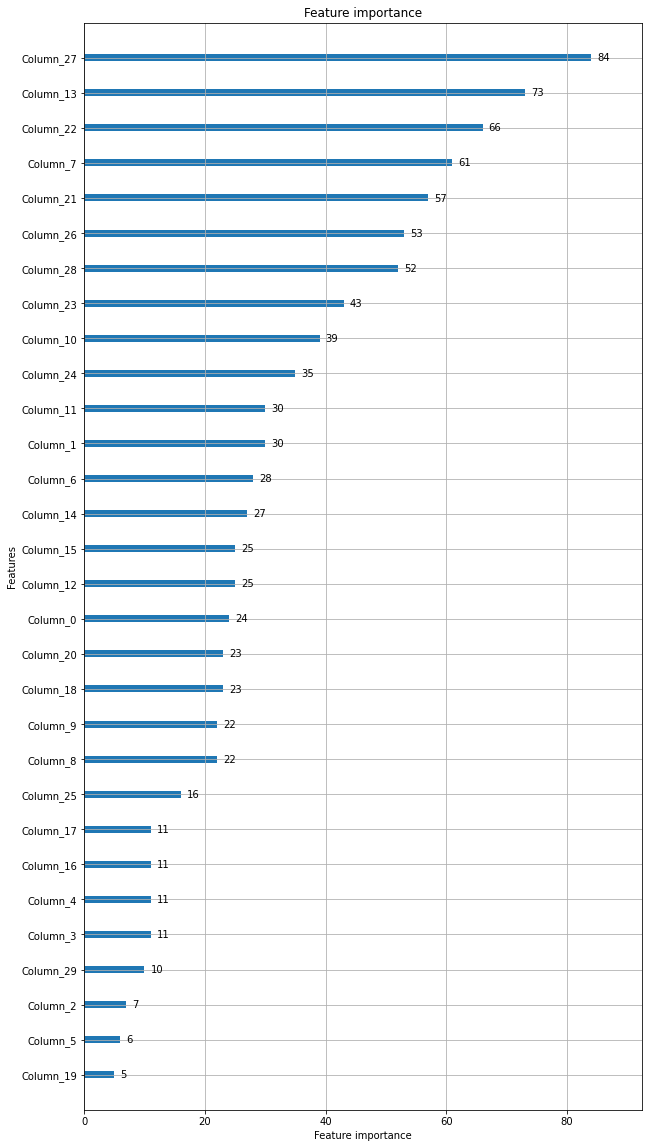

In [17]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,20))
plot_importance(lgclf,ax=ax)